# 2C2_hichip_pca

7/12/2021

make a hichip pca for replicates of the 


In [1]:
import pandas as pd
import os, glob
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
normal_tissues = ['Air','Astro','Blad','Colon','Eso',
# 'GDSD0',
# 'GDSD3',
'GDSD6',
'GM12878',
'HMEC',
'MC',
'Ova',
'Panc',
'Pros',
'Renal',
'Thy',
'Uter']

In [3]:
hichip_dir = '../data/interim/hichip/'
loop_files = glob.glob(os.path.join(hichip_dir, '*','*loop_counts.csv'))
len(loop_files)

76

In [4]:
%%time
loop_df_all = pd.DataFrame(columns = ['loop'])
for loop_file in sorted(set(loop_files)):
    sample = os.path.basename(loop_file).split('.loop_counts')[0]
    sample = sample.replace('HMEC0','HMEC')
    sample = sample.replace('HMEC4','HMEC')
    
    tissue = sample.split('_')[0]
    if tissue in normal_tissues:
        loop_df = pd.read_csv(loop_file,index_col=0)
        loop_df['loop'] = loop_df.source + '::' + loop_df.target
        loop_df = loop_df[['loop','count']]
        loop_df.columns = ['loop',sample]

        loop_df_all = loop_df_all.merge(loop_df,how='outer',on='loop')
        print(sample, tissue, loop_df_all.shape)

Air_B1 Air (29646, 2)
Air_B3 Air (57275, 3)
Astro_B1 Astro (84064, 4)
Astro_B2 Astro (226321, 5)
Blad_B1 Blad (261407, 6)
Blad_B2 Blad (333210, 7)
Colon_B1 Colon (383556, 8)
Colon_B2 Colon (464887, 9)
Eso_B1 Eso (503791, 10)
Eso_B2 Eso (538876, 11)
GDSD6_B1 GDSD6 (579943, 12)
GDSD6_B2 GDSD6 (607500, 13)
GM12878_B1 GM12878 (673296, 14)
GM12878_B2 GM12878 (704876, 15)
HMEC_B1 HMEC (720116, 16)
HMEC_B2 HMEC (722660, 17)
MC_B1 MC (734998, 18)
MC_B2 MC (747464, 19)
Ova_B1 Ova (765277, 20)
Ova_B2 Ova (776748, 21)
Panc_B1 Panc (776761, 22)
Panc_B2 Panc (786524, 23)
Panc_B3 Panc (795202, 24)
Pros_B1 Pros (819973, 25)
Pros_B2 Pros (872176, 26)
Renal_B1 Renal (925408, 27)
Renal_B2 Renal (930547, 28)
Thy_B1 Thy (945839, 29)
Thy_B2 Thy (951447, 30)
Uter_B1 Uter (951624, 31)
Uter_B2 Uter (1087371, 32)
Uter_B3 Uter (1092981, 33)
CPU times: user 1min 17s, sys: 4.03 s, total: 1min 21s
Wall time: 23.2 s


In [5]:
%%time
#takes awhile
loop_df_all = loop_df_all.set_index('loop').fillna('0')
loop_df_all.to_csv(os.path.join(hichip_dir, 'loop_df_all_normal_sample.csv'))

CPU times: user 49.4 s, sys: 4.68 s, total: 54.1 s
Wall time: 51.4 s


In [6]:
column_names = loop_df_all.columns
print(column_names)

Index(['Air_B1', 'Air_B3', 'Astro_B1', 'Astro_B2', 'Blad_B1', 'Blad_B2',
       'Colon_B1', 'Colon_B2', 'Eso_B1', 'Eso_B2', 'GDSD6_B1', 'GDSD6_B2',
       'GM12878_B1', 'GM12878_B2', 'HMEC_B1', 'HMEC_B2', 'MC_B1', 'MC_B2',
       'Ova_B1', 'Ova_B2', 'Panc_B1', 'Panc_B2', 'Panc_B3', 'Pros_B1',
       'Pros_B2', 'Renal_B1', 'Renal_B2', 'Thy_B1', 'Thy_B2', 'Uter_B1',
       'Uter_B2', 'Uter_B3'],
      dtype='object')


In [7]:
%%time
loop_df_all = np.array(loop_df_all)
print(loop_df_all.shape)
loop_df_all = loop_df_all.T
print(loop_df_all.shape)

(1092981, 32)
(32, 1092981)
CPU times: user 672 ms, sys: 13.3 ms, total: 685 ms
Wall time: 684 ms


In [8]:
%%time
# takes awhile
pca = PCA(n_components=32)
prcomp = pca.fit_transform(loop_df_all)

CPU times: user 21.2 s, sys: 1.43 s, total: 22.7 s
Wall time: 4.65 s


In [18]:
perc_var_df = pd.DataFrame({
    'PC':['PC'+str(x+1) for x in range(prcomp.shape[1])],
    'perc_variance_explained':list(pca.explained_variance_ratio_)
})
perc_var_df.to_csv('../data/processed/fig1/hichip/hichip_loop_pca_var_explained.csv')
    

In [80]:
prcomp_df = pd.DataFrame(data = prcomp
             , columns =  ['PC'+str(x+1) for x in range(prcomp.shape[1])], index=column_names)
prcomp_df['tissue'] = [sample.split('_')[0] for sample in prcomp_df.index]

In [84]:
prcomp_df.to_csv('../data/processed/fig1/hichip/hichip_loop_pca.csv')

In [81]:
prcomp_df#.describe()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC24,PC25,PC26,PC27,PC28,PC29,PC30,PC31,PC32,tissue
Air_B1,-3208.011345,2322.987427,-262.858767,319.259101,-1943.761956,811.471613,71.675297,-254.896238,-245.599372,445.182415,...,333.733024,-1287.430311,-511.766618,-476.193063,236.263387,1667.973663,1387.829380,56.974463,8.359643e-10,Air
Air_B3,-2238.824321,2285.724905,-889.631294,101.347988,-1279.088212,817.266413,70.476312,-290.913806,-385.593113,473.191189,...,558.928997,-1674.916335,-1059.971884,-1406.808880,-1694.220512,-1096.396169,-223.143760,9.242194,8.359643e-10,Air
Astro_B1,-4732.937735,1196.484375,240.011186,1406.849763,-1169.403696,-404.448619,-105.979519,-530.496028,-504.110259,124.816179,...,-157.943019,-408.869135,140.363313,2755.467856,-1071.185776,-532.187581,516.926774,-28.561246,8.359643e-10,Astro
Astro_B2,-1211.595435,655.942876,1550.141429,5251.098703,2319.450196,-3894.847428,-3044.452275,3499.990223,-3994.711783,-293.217697,...,131.207034,-82.787969,22.370131,-272.851558,137.501427,71.435012,-53.816453,0.511631,8.359643e-10,Astro
Blad_B1,-839.650341,2936.236215,-691.342921,199.765529,-1133.633503,1592.900152,-576.168792,656.289107,336.833409,157.246060,...,3295.172725,1838.264165,114.704057,120.367483,-56.536314,-25.289968,41.331803,2.471451,8.359643e-10,Blad
Blad_B2,4026.626775,5180.246031,-1066.140448,-81.771735,-1124.097578,5101.001694,-2636.159554,4961.903579,1646.447944,-97.839981,...,-994.250348,-57.727052,123.266844,152.218817,66.040684,-86.630665,-97.826617,14.861504,8.359643e-10,Blad
Colon_B1,1510.187918,-4003.833596,-395.091575,-868.992395,-1311.868535,6.320169,-1013.315329,-68.894762,306.661731,78.295370,...,180.281171,3.706419,49.393916,-81.703457,-25.523733,-33.957987,7.682630,2.561056,8.359643e-10,Colon
Colon_B2,7039.634071,-9214.966341,-883.879632,-2829.052616,-297.733451,-1711.952577,-1897.252621,734.047235,298.987218,4923.811513,...,96.323753,-177.349158,59.132292,108.709648,21.420107,38.578698,-47.538167,3.618185,8.359643e-10,Colon
Eso_B1,1921.708634,-5463.079749,613.726286,2947.595050,2241.479327,2540.930037,2690.976478,-30.017024,-149.968527,-41.069770,...,-260.751140,35.235124,21.628433,11.306441,40.150129,9.053261,1.139629,-0.964747,8.359643e-10,Eso
Eso_B2,2862.868028,-6180.826109,711.488638,3352.475445,2946.185238,2950.775290,3087.485798,88.171540,-55.142483,-54.504515,...,-12.125195,-49.137818,10.416922,28.301597,44.758648,16.605780,-25.547932,0.248386,8.359643e-10,Eso


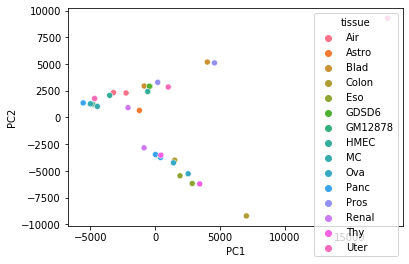

In [83]:
sns.scatterplot(data=prcomp_df,x='PC1',y='PC2', hue='tissue')

In [76]:
fig = plt.figure()
for idx , row in prcomp_df.iterrows():
    plt.text(row.PC1, row.PC2, s=row.name)
plt.show()

ValueError: Image size of 7856440x4020776 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 432x288 with 1 Axes>